Import 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

Define Franke function

In [2]:
def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4

Create design matrix for for two dimensions

In [3]:
def create_X(x, y, n):
    #n is the order of the polynomial, in this project it will be 5
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)
    N = len(x)
    p = int((n+1)*(n+2)/2)  #Number of elements in beta, 
    X = np.ones((N, p))
    
    for i in range(1,n+1):
        q = int(i*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    
    return X

Define R2 score function

In [4]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

Define Mean Squared Error (MSE) function

In [5]:
def MSE(y_data,y_model):
    return np.sum((y_data-y_model)**2)/len(y_data)

Make design matrix

Normal distributed noise is added to the Franke-function 

In [6]:
n = 100 #size of x and y
N = 5 #polynomial degree
noise_factor = 0.01

x = np.random.uniform(0,1,n)
y = np.random.uniform(0,1,n)
noise = noise_factor*np.random.randn(100,1)
z = FrankeFunction(x,y) + noise

X = create_X(x, y, N)

DesignMatrix = pd.DataFrame(X)
#display(DesignMatrix)

Perform the Ordinary Least Square (OLS) method and print the MSE and R2 results

In [9]:
X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train

z_tilde = X_train @ beta
z_predict = X_test @ beta

print("Training R2")
print(R2(z_train,z_tilde))
print(' ')
print("Training MSE")
print(MSE(z_train,z_tilde))
print(' ')
print("Test R2")
print(R2(z_test,z_predict))
print(' ')
print("Test MSE")
print(MSE(z_test,z_predict))

Training R2
-2.0469275768596877
 
Training MSE
0.28482363393388554
 
Test R2
-4.400785106255747
 
Test MSE
0.558295288319438


Study the bias-variance trade-off by plotting the MSE for increasing model complexity (i.e. the number of polynomials)

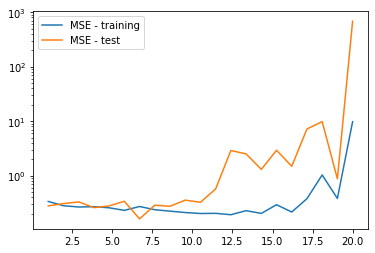

In [30]:
np.random.seed(47309275)
max_degree = 20
n = 400
noise_factor = .5

degree = np.linspace(1, max_degree, max_degree+1)
MSE_test = np.zeros(max_degree+1)
MSE_train = np.zeros(max_degree+1)

noise = noise_factor*np.random.randn(n)
x = np.random.uniform(0,1,n)
y = np.random.uniform(0,1,n)

z = FrankeFunction(x,y) + noise

for i in range(max_degree+1):
    N = i #polynomial degree
    X = create_X(x, y, N)
    
    X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2)

    scaler = StandardScaler(with_mean = True, with_std = False)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
    z_tilde = X_train @ beta
    z_predict = X_test @ beta
    MSE_train[i] = MSE(z_train,z_tilde)
    MSE_test[i] = MSE(z_test,z_predict)
    
plt.plot(degree, MSE_train, label='MSE - training')
plt.plot(degree, MSE_test, label='MSE - test')
plt.yscale('log')
plt.legend()
plt.show()